In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from natsort import natsorted
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import shap
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


In [3]:
train = pd.read_csv('/content/drive/My Drive/BUN_BO/Data.SHL/Data_using/data_train.csv')
test = pd.read_csv('/content/drive/My Drive/BUN_BO/Data.SHL/Data_using/data_test.csv')
train.drop("action", axis = 1)
test.drop("action", axis = 1)

,atr01/acc_x,atr01/acc_y,atr01/acc_z,atr01/gyro_x,atr01/gyro_y,atr01/gyro_z,atr01/quat_w,atr01/quat_x,atr01/quat_y,atr01/quat_z,...,atr04/gyro_x_mean,atr04/gyro_x_std,atr04/acc_y_mean,atr04/acc_y_std,atr04/gyro_y_mean,atr04/gyro_y_std,atr04/acc_z_mean,atr04/acc_z_std,atr04/gyro_z_mean,atr04/gyro_z_std
0,0.9647,0.0055,0.0044,-120.60,-12.02,7.56,0.639640,0.307427,-0.634987,0.305190,...,-25.320000,NaN,-0.929800,NaN,106.9200,NaN,-0.061900,NaN,-12.100000,NaN
1,0.7069,0.0016,0.2686,86.19,54.18,45.61,-0.519414,0.332219,-0.464453,-0.635707,...,-28.120000,3.959798,-1.001800,0.101823,34.8100,101.978940,0.088350,0.212486,-46.050000,48.012550
2,0.9742,-0.0344,-0.1432,-120.29,-6.34,10.69,-0.271750,0.620001,-0.139708,-0.722657,...,-27.686667,2.898850,-1.036367,0.093641,58.2300,82.736578,0.136800,0.172097,-30.396667,43.447474
3,0.8602,0.1683,-0.2760,19.42,15.88,-21.82,-0.366613,0.614582,-0.155199,-0.681026,...,-19.442500,16.657351,-0.974925,0.144727,43.3825,73.792641,0.185975,0.171516,-20.850000,40.286607
4,0.8233,0.2677,-0.0777,-13.04,-3.75,6.89,-0.318778,0.635512,-0.122766,-0.692411,...,-19.108000,14.445067,-0.934100,0.155058,40.8500,64.156708,0.162940,0.157214,-20.282000,34.912335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155873,0.3138,0.1134,0.8868,42.60,57.34,-11.18,0.366178,-0.915959,-0.027249,0.161834,...,1.497000,4.732345,-0.955960,0.059856,5.4470,7.999331,0.298540,0.168111,2.019000,8.948442
155874,0.9202,0.1715,0.3970,-0.61,14.07,-2.77,0.359288,-0.924300,-0.029901,0.125249,...,1.617000,4.713232,-0.955080,0.059313,5.3910,8.037656,0.299640,0.167097,2.039000,8.943029
155875,0.9329,0.1779,0.3948,-2.05,-6.98,1.44,0.340796,-0.921933,-0.037034,0.180352,...,1.812000,4.609603,-0.959300,0.060897,4.5310,8.052029,0.283550,0.172690,3.012000,7.940182
155876,0.8856,0.2018,0.4466,2.26,-34.83,-3.18,0.334771,-0.874785,-0.095382,0.337020,...,1.719000,4.631531,-0.958930,0.060684,4.4000,8.124919,0.290120,0.168592,3.115000,7.896990


In [4]:
train.isna().sum()

,0
action,0
atr01/acc_x,0
atr01/acc_y,0
atr01/acc_z,0
atr01/gyro_x,0
...,...
atr04/gyro_y_std,11
atr04/acc_z_mean,0
atr04/acc_z_std,11
atr04/gyro_z_mean,0


In [5]:
test.isna().sum()

,0
action,0
atr01/acc_x,0
atr01/acc_y,0
atr01/acc_z,0
atr01/gyro_x,0
...,...
atr04/gyro_y_std,2
atr04/acc_z_mean,0
atr04/acc_z_std,2
atr04/gyro_z_mean,0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756499 entries, 0 to 756498
Columns: 122 entries, action to atr04/gyro_z_std
dtypes: float64(120), int64(2)
memory usage: 704.1 MB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155878 entries, 0 to 155877
Columns: 122 entries, action to atr04/gyro_z_std
dtypes: float64(120), int64(2)
memory usage: 145.1 MB


In [8]:
# a()

In [9]:
target = "operation"

print("Kích thước dữ liệu train:", train.shape)
print("Kích thước dữ liệu test:", test.shape)

train[target] = train[target].astype('category')
test[target] = test[target].astype('category')

train.dropna(inplace=True)
test.dropna(inplace=True)

print("Kích thước dữ liệu train:", train.shape)
print("Kích thước dữ liệu test:", test.shape)

Kích thước dữ liệu train: (756499, 122)
Kích thước dữ liệu test: (155878, 122)
Kích thước dữ liệu train: (756488, 122)
Kích thước dữ liệu test: (155876, 122)


In [10]:
X_train = train.drop(target, axis=1)
y_train = train[target]

X_test = test.drop(target, axis=1)
y_test = test[target]

In [11]:
# b()

Trước SMOTE: 2     127723
6     101661
1     101647
0      84755
4      80370
3      78331
9      58438
7      55010
5      31131
8      24632
10     12790
Name: count, dtype: int64
Sau SMOTE: 0     127723
1     127723
2     127723
10    127723
3     127723
4     127723
5     127723
6     127723
7     127723
8     127723
9     127723
Name: count, dtype: int64
Nhãn trong y_train_resampled: [ 0  1  2  3  4  5  6  7  8  9 10]
Nhãn trong y_test_encoded: [ 0  1  2  3  4  5  6  7  8  9 10]

🔍 Đang huấn luyện mô hình: XGBoost
AUROC của XGBoost: 0.9940
              precision    recall  f1-score   support

         100       0.75      0.93      0.83     14978
         200       0.99      0.65      0.78     22388
         300       0.94      0.91      0.92     23765
         400       0.84      0.96      0.90     12987
         500       0.91      0.89      0.90     14822
         600       1.00      0.99      1.00      6453
         700       0.87      0.96      0.91     28081
         800    

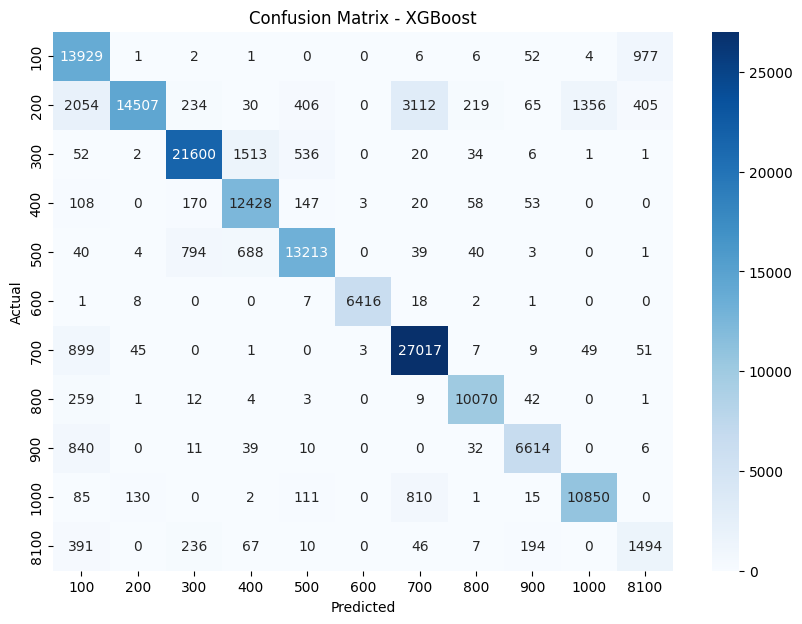

In [ ]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

print("Trước SMOTE:", pd.Series(y_train_encoded).value_counts())
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train_encoded)
print("Sau SMOTE:", pd.Series(y_train_resampled).value_counts())

print("Nhãn trong y_train_resampled:", np.unique(y_train_resampled))
print("Nhãn trong y_test_encoded:", np.unique(y_test_encoded))

models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "KNN (K-Nearest Neighbors)": KNeighborsClassifier(n_neighbors=5),
    "XGBoost": XGBClassifier(n_estimators=200, max_depth=6, learning_rate=0.1, random_state=42)
}

for model_name, model in models.items():
    print(f"\n🔍 Đang huấn luyện mô hình: {model_name}")
    model.fit(X_train_resampled, y_train_resampled)

    y_pred_encoded = model.predict(X_test)

    y_pred = label_encoder.inverse_transform(y_pred_encoded)
    y_test_original = label_encoder.inverse_transform(y_test_encoded)

    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)
        if len(np.unique(y_test_encoded)) == 2:
            auc = roc_auc_score(y_test_encoded, y_pred_proba[:, 1], average='macro')
        else:
            auc = roc_auc_score(y_test_encoded, y_pred_proba, multi_class='ovr')
        print(f"AUROC của {model_name}: {auc:.4f}")
    else:
        print(f"{model_name} không hỗ trợ predict_proba().")

    print(classification_report(y_test_original, y_pred))

    plt.figure(figsize=(10, 7))
    sns.heatmap(confusion_matrix(y_test_original, y_pred), annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()



In [13]:
b()

NameError: name 'b' is not defined

In [ ]:
def fill_nan_with_int(data):
  data.replace(0, pd.NA, inplace=True)
  data.fillna(method='ffill', inplace=True)